In [2]:
from fastai.vision.all import *
# import pytorch

input data -> time

In [3]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

actual recorded speed corresponding to time. This real time will be the labels, against which the predicted speed will be compared

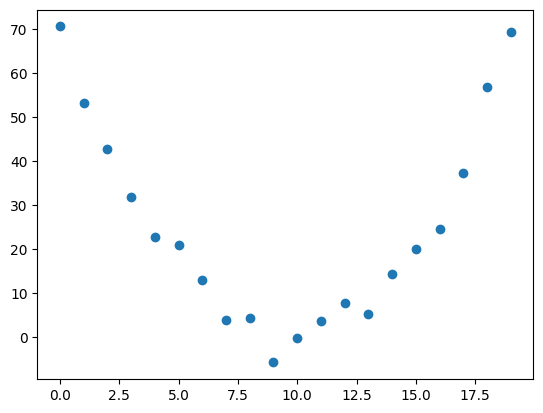

In [8]:
random = torch.randn(20)*3
speed = 0.75*(time - 9.5)**2 +1
# print(speed)
# print(temp)
speed += random
# plt.scatter(time,temp)
plt.scatter(time,speed)

the function for the model. from the above graph we can see that the model should be a quadratic function to predict speed

In [9]:
def model(t, params):
    a,b,c = params
    return a*(t**2) + b*t + c

this loss function will compare predictions and labels to tell us how good the weights or parameters in the above model are.

In [22]:
def mse_loss(preds, labels):
    #using mse
    return ((preds-labels)**2).mean()

**7 step process to train model**

1. initializing parameters or weights
    we will also setup gradient functions

In [14]:
params = torch.randn(3).requires_grad_()
params

tensor([ 1.4020, -1.0793,  0.4481], requires_grad=True)

In [15]:
orig_params = params.clone()

2. calculate predictions
    use the model to calculate predictions

In [19]:
preds = model(time, params)

small function to see how our predictions compare to actual labels

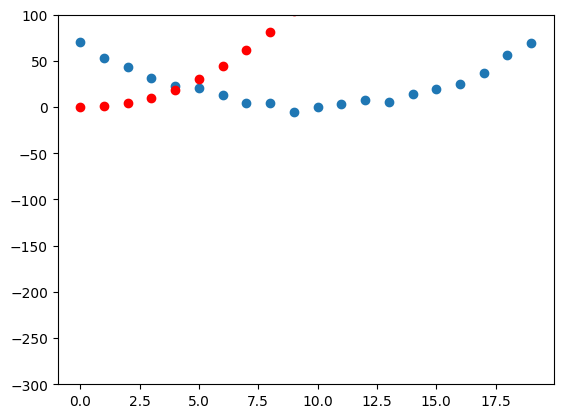

In [21]:
def show_preds(preds, ax = None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

show_preds(preds)

of course the random parametres are not giving a good prediction

3. calculate the loss
    use the function we created above for loss

In [23]:
loss = mse_loss(preds,speed)
loss

tensor(41604.2656, grad_fn=<MeanBackward0>)

now the goal is to improve this loss, such that it gets lower and lower. for that we use gradient

4. calculate gradients

In [24]:
loss.backward()
params.grad

tensor([67876.3672,  4343.5039,   276.9193])

In [25]:
params #the parameters are still the same. No change in value yet

tensor([ 1.4020, -1.0793,  0.4481], requires_grad=True)

let us take the learning rate as 1e-5

5. step the weights

In [28]:
lr = 1e-5
# updating the parameters
params.data -= lr*params.grad.data
params.grad = None

In [29]:
params

tensor([ 0.7232, -1.1227,  0.4453], requires_grad=True)

let us see if the loss has improved. So we calculate the predictions again and compare them with labels

In [30]:
preds = model(time,params)
mse_loss(preds, speed)

tensor(8411.5391, grad_fn=<MeanBackward0>)

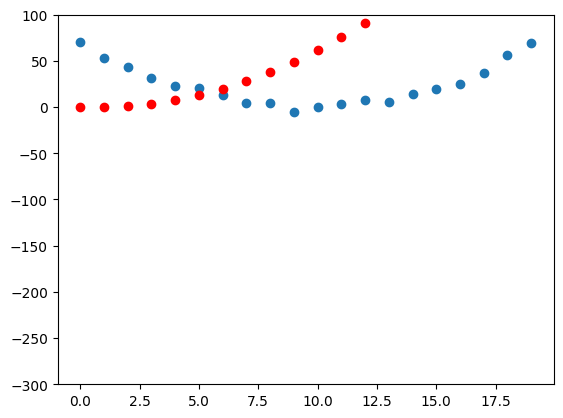

In [31]:
show_preds(preds)

a little bit better. Repeat this whole process a few times

In [34]:
def apply_step(params, prn = True):
    preds = model(time,params) # calculate predictions
    loss = mse_loss(preds, speed) # calculate loss
    loss.backward() # call backward on loss, or calculate gradients
    params.data = lr*params.grad.data # take a step. update parameters according to learning rate
    params.grad = None
    if prn: print(loss.item())
    return preds

6. repeat the whole process

In [35]:
for i in range(10): apply_step(params)

8411.5390625
1463.568115234375
699.4443969726562
1277.5712890625
1926.5716552734375
2396.15673828125
2694.318115234375
2873.263427734375
2977.713134765625
3037.79541015625


In [36]:
params = orig_params.detach().requires_grad_()

the loss is going down. But this is not intuitive. So we will plot the graph for each iteration.

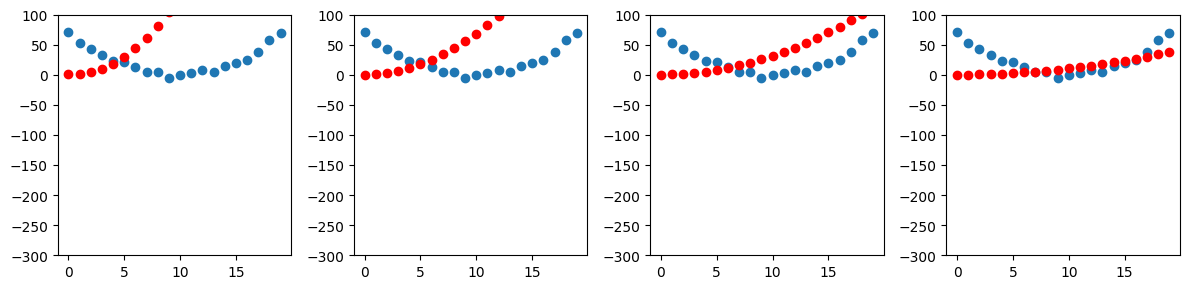

In [37]:
_,axs = plt.subplots(1,4,figsize = (12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

for now we stop after 10 epochs arbitrarily. In practice, we would watch the training and validation losses and our metrics to decide when to stop.